### Example 1 - House Prices

`1.` Using statsmodels, fit three individual simple linear regression models to predict price.  You should have a model that uses **area**, another using **bedrooms**, and a final one using **bathrooms**.

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [196]:
df = pd.read_csv('../../Data/house_prices.csv')

# Add intercept column
df['intercept'] = 1

df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1
3,3525,A,1940,4,2,ranch,493675,1
4,5108,B,2208,6,4,victorian,1101539,1


##### Simple Linear Regression - Area

In [197]:
# Create linear regression model
lm = sm.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Simple Linear Regression - Bedrooms

In [198]:
# Create linear regression model
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Simple Linear Regression - Bathrooms

In [199]:
# Create linear regression model
lm = sm.OLS(df['price'], df[['intercept', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus, we find that for each of our simple linear regression models using *area*, *bedrooms*, and *bathrooms* produces results that each is statistically significant.

However, we also can see that if we sum the R-squared values, we obtain a value greater than 1, which is not possible for independent variables. Thus, we can conclude that one or more of these variables is correlated.

`2.` Now that you have looked at the results from the simple linear regression models, let's try a multiple linear regression model using all three of these variables  at the same time.

##### Multiple Linear Regression - Quantitative Variables

In [200]:
# Create linear regression model
lm = sm.OLS(df['price'], df[['intercept', 'bathrooms', 'bedrooms', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using our multiple linear regression model, we find that only *area* is statistically significant. However, we need more tools to determine just why this is. Hint: [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity).

We can also see that the R-squared value is less than 1.

`3.` Along with using the **area**, **bedrooms**, and **bathrooms** you might also want to use **style** to predict the price.  Try adding this to your multiple linear regression model.  What happens?

In [201]:
# Create linear regression model
### Running this causes an error because style is not a numeric value
# lm = sm.OLS(df['price'], df[['intercept', 'bathrooms', 'bedrooms', 'area', 'style']])
# results = lm.fit()
# results.summary()

### Example 2 - Dummy Variables - 1,0 Coding Scheme

##### Multiple Linear Regression - Dummy Variables - Style - 1,0 Coding Scheme

In [202]:
df[['lodge', 'ranch', 'victorian']] = pd.get_dummies(df['style'])
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,0,1
2,5952,B,1134,3,2,ranch,571669,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,0,1


In [203]:
lm = sm.OLS(df['price'], df[['intercept', 'lodge', 'ranch']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.046e+06   7775.607    134.534      0.000    1.03e+06    1.06e+06
lodge      -7.411e+05   1.44e+04    -51.396      0.000   -7.69e+05   -7.13e+05
ranch       -4.71e+05   1.27e+04    -37.115      0.000   -4.96e+05   -4.46e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept in the above case equates to our baseline, i.e., the style is Victorian. Thus, if our house is Victorian, we could say the value of our home is $\approx 1\text{M}$ while a lodge is $741\text{K}$ less and a ranch is $471\text{K}$ less.

##### Multiple Linear Regression - Dummy Variables - Neighborhood - 1,0 Coding Scheme

In [204]:
df[['A','B','C']] = pd.get_dummies(df['neighborhood'])
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,lodge,ranch,victorian,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,0,1,0,1,0
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,1,0,1,0,0
4,5108,B,2208,6,4,victorian,1101539,1,0,0,1,0,1,0


In [205]:
lm = sm.OLS(df['price'], df[['intercept', 'B', 'C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

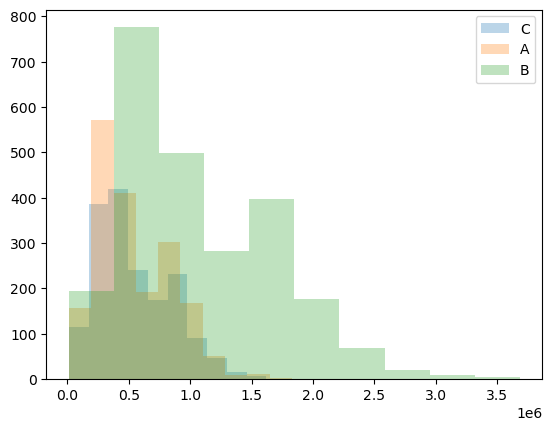

In [206]:
plt.hist(df.query("C == 1")['price'], alpha = 0.3, label = 'C')
plt.hist(df.query("A == 1")['price'], alpha = 0.3, label = 'A')
plt.hist(df.query("B == 1")['price'], alpha = 0.3, label = 'B')

plt.legend()

In [207]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bathrooms', 'lodge', 'victorian', 'B', 'C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this, we can conclude:
* 80.9% of the variability in price can be explained by the linear model built using bedrooms, bathrooms, neighborhood, and home style.
* For every additional bedroom a home has, we can expect the price to increase by $173,200 holding all other variables constant.
* For every additional bathroom a home has, we can expect the prices to increase by $99,960 holding all other variables constant.
* We expect that a victorian house will cost $70,560 more than a ranch house, all else being equal.
* We expect that a house in neighborhood C will cost $7168 less than a neighborhood A house all else being equal.

### Example 3 - Dummy Variables - 1,0,-1 Coding Scheme

##### Multiple Linear Regression - Dummy Variables - Style - 1,0,-1 Coding Scheme

In [208]:
## The below function creates 1, 0, -1 coded dummy variables.

def dummy_cat(df, col):
    '''
    INPUT:
    df - the dataframe where col is stored
    col - the categorical column you want to dummy (as a string)
    OUTPUT:
    df - the dataframe with the added columns for dummy variables using 1, 0, -1 coding
    '''
    for idx, val_0 in enumerate(df[col].unique()):
        if idx + 1 < df[col].nunique(): # if not last column
            df[val_0] = df[col].apply(lambda x: 1 if x == val_0 else 0) 
        else: # if last column
            df[val_0] = df[col].apply(lambda x: -1 if x == val_0 else 0) # create a final temporary column with -1
            for idx, val_1 in enumerate(df[col].unique()): # loop through again
                if idx + 1 < df[col].nunique(): # if not last column
                    df[val_1] = df[val_0] + df[val_1] # add temporary column to next column
                else: # if last column
                    df = df.drop(val_1, axis=1) # drop temporary column
    return df

In [209]:
new_df = dummy_cat(df.drop(['A', 'B', 'C'], axis=1), 'style') # Use on style and remove A, B, C columns from previous model
new_df.head(10)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1
2,5952,B,1134,3,2,ranch,571669,1,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1
5,7507,C,1785,4,2,lodge,455235,1,-1,-1
6,4964,B,2996,5,3,victorian,1489871,1,0,1
7,7627,C,3263,5,3,victorian,821931,1,0,1
8,6571,A,1159,3,2,ranch,299903,1,1,0
9,5220,A,1248,3,2,victorian,321975,1,0,1


In [210]:
lm = sm.OLS(new_df['price'], new_df[['intercept', 'victorian', 'ranch']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.421e+05   5854.251    109.677      0.000    6.31e+05    6.54e+05
victorian    4.04e+05   7377.372     54.763      0.000     3.9e+05    4.18e+05
ranch      -6.695e+04   8233.489     -8.131      0.000   -8.31e+04   -5.08e+04
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         1.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Compare Above 1,0,-1 Coding Scheme to 1,0 Coding Scheme

In [211]:
new_df = df.drop(['A', 'B', 'C', 'lodge'], axis=1)
new_df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1
2,5952,B,1134,3,2,ranch,571669,1,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1


In [212]:
lm = sm.OLS(new_df['price'], new_df[['intercept', 'victorian', 'ranch']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.05e+05   1.21e+04     25.120      0.000    2.81e+05    3.29e+05
victorian   7.411e+05   1.44e+04     51.396      0.000    7.13e+05    7.69e+05
ranch       2.701e+05   1.57e+04     17.153      0.000    2.39e+05    3.01e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given the 1,0 and 1,0,-1 coding schemes and models above:
* As compared to a lodge home, we predict a victorian home to have a higher price by $741,100, holding all other variables constant.
* As compared to the average home, we predict the price of a victorian home to be $404,000 greater, hold all other variables constant.

Remember, in order to predict the baseline category in the 1, 0 coding, you use the intercept. In the 1, 0, -1 coding, you need to multiply each categorical coefficient by -1 to get at the missing category.

With this in mind, what is the predicted average price for lodges using the 1,0,-1 coding model?
* 305050 

Also notice this matches the same prediction (off by 50 due to rounding), that you see in the 0,1 coded model.

### Example 4 - Multicollinearity & Variance Inflation Factors

##### Multicollinearity Viewed from Pairplots

In [213]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,lodge,ranch,victorian,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,0,1,0,1,0
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,1,0,1,0,0
4,5108,B,2208,6,4,victorian,1101539,1,0,0,1,0,1,0


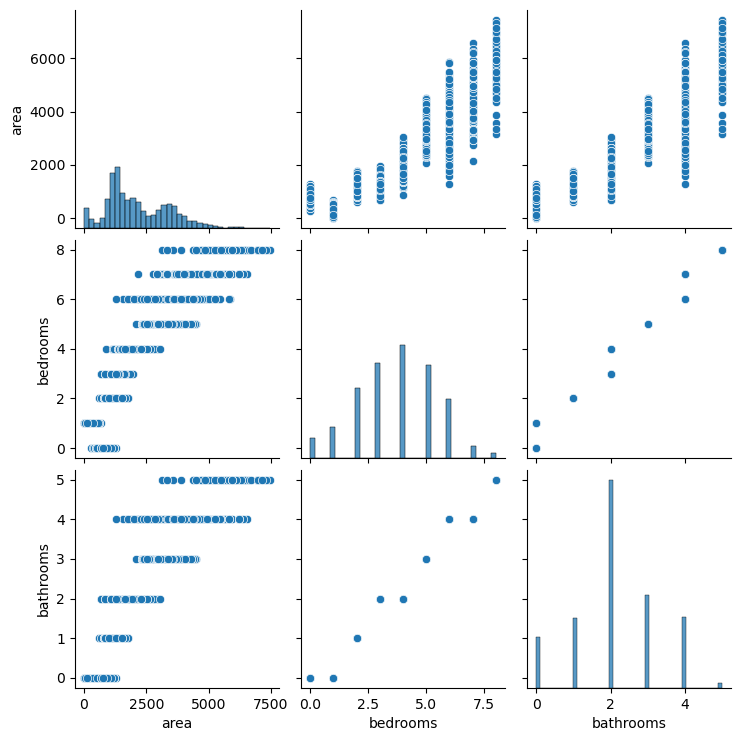

In [227]:
# sns.pairplot(df[['area', 'bedrooms', 'bathrooms', 'style']], hue='style') # correlation with style appears to be present
# sns.pairplot(df[['area', 'bedrooms', 'bathrooms', 'neighborhood']], hue='neighborhood') # no correlation with neighborhood incorporated is obvious
sns.pairplot(df[['area', 'bedrooms', 'bathrooms']])

The above pairplots show a clear positive correlation between our predictor variables of bedrooms and bathrooms when estimating the price of a house.

Yet, when we run an ordinary least squares model, we see something interesting. The number of bathrooms is negatively correlated with price. However, based on the relationships above, which are all positively correlated, we would also expect an increase in the number of bathrooms to correspond to an increase in price (just like for the area and number of bedrooms).

In [ ]:
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:12:25   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This can be confirmed by looking at a pairplot only of the price and number of bedrooms which shows a positive correlation.

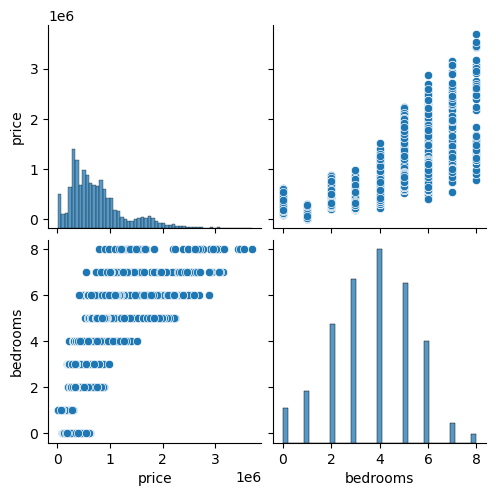

In [ ]:
sns.pairplot(df[['price', 'bedrooms']])

##### Variance Inflation Factors

[Another example](https://etav.github.io/python/vif_factor_python.html)

In [ ]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,7.33,Intercept
1,5.46,area
2,20.85,bedrooms
3,19.01,bathrooms


From this, we can see it appears the variables for bedrooms and bathrooms are correlated. We will rerun the model and re-compute the VIFs without bathrooms to see how our model changes.

(Note: we could have chosen either bedrooms or bathrooms. The choice is a decision and often comes down to what variables are perceived to have greater explainability or would be of greater interest for our particular domain.)

In [224]:
# Create linear regression model
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:20:18   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
# VIFs with bathrooms removed
y, X = dmatrices('price ~ area + bedrooms', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,6.06,Intercept
1,5.35,area
2,5.35,bedrooms


From the above results, we can see three things.
1. All VIFs are below 10.
1. All of the coefficients are now positive, as we would expect.
1. To three digits, the R-squared value stayed the same, suggesting we didn't really need both bedrooms and bathrooms in the model.

### Example 5 - Interpreting Model Coefficients

In [229]:
df = pd.read_csv('../../Data/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` For the first model, fit a model to predict `price` using `neighborhood`, `style`, and the `area` of the home.  Use the output to match the correct values to the corresponding interpretation in quiz 1 below.  Don't forget an intercept!  You will also need to build your dummy variables, and don't forget to drop one of the columns when you are fitting your linear model. It may be easiest to connect your interpretations to the values in the first quiz by creating the baselines as neighborhood C and home style **lodge**.

In [230]:
# Add intercept column
df['intercept'] = 1

# Create dummy variables
df[['lodge', 'ranch', 'victorian']] = pd.get_dummies(df['style'])
df[['A','B','C']] = pd.get_dummies(df['neighborhood'])

# Create linear regression model
lm = sm.OLS(df['price'], df[['intercept', 'area', 'ranch', 'victorian', 'A', 'B']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:23:32   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.983e+05   5540.744    -35.791      0.000   -2.09e+05   -1.87e+05
area         348.7375      2.205    158.177      0.000     344.415     353.060
ranch      -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
victorian  -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
A           -194.2464   4965.459     -0.039      0.969   -9928.324    9539.832
B           5.243e+05   4687.484    111.844      0.000    5.15e+05    5.33e+05
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this, we can see that
* The predicted difference in the price of a home in neighborhood A as compared to neighborhood C, hold all other variables constant, is -$194.25.
* For every one unit increase in the area of a home, we predict the price of the home to increase by $348.74 (holding all other variables constant).
* The predicted home price if the home is a lodge in neighborhood C with an area of 0 is -$198,000.
* A lodge is more expensive than a victorian home by $6262.73 (holding all other variables constant).
* A better model might only include the area and neighborhood B vs the other neighborhoods

In [231]:
# Add higher order term - area squared
df['area_squared'] = df['area'] * df['area']

# Create linear regression model - with higher order term but no neighborhood terms
lm = sm.OLS(df['price'], df[['intercept', 'area', 'area_squared', 'ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:24:46   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
victorian     2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using these results, we see that
* the effects due to a change in *area* become more difficult to interpret.
* adding a higher order term for our area is not helpful for predicting the price of a home
* the predicted difference between a ranch home and a lodge home is $9917.25 (holding all other variables constant)
